## Import Libraries
We will start by importing the necessary libraries for data manipulation and visualization.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

# Load Dataset
Next, we will load the dataset from an Excel file.

In [4]:
df = pd.read_excel("Data_cleaning.xlsx")

# Data Overview
Let's take a look at the first few rows of our dataset to understand its structure.

In [6]:
# Displaying a sample of the data
df.head()

,Customer_Number,Attrition_Flag,Age,Date_of_birth,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,3708092208,Existing Customer,45,1979-06-09,F,3,High School,Married,Less than $40K,Blue,...,3,3,3544.0,1661,1883.0,0.831,15149,111,0.734,0.469
1,3708093408,Attrited Customer,58,1966-05-28,M,0,High School,Single,$40K - $60K,Blue,...,1,3,3421.0,2517,904.0,0.992,992,21,0.400,0.736
2,3708094683,Attrited Customer,46,1978-06-29,M,3,Doctorate,Divorced,$80K - $120K,Blue,...,3,3,8258.0,1771,6487.0,0.000,1447,23,0.000,0.214
3,3708095583,Existing Customer,34,1990-06-23,F,2,Uneducated,Single,Less than $40K,Blue,...,2,2,1438.3,0,1438.3,0.827,3940,82,0.952,0.000
4,3708097083,Existing Customer,49,1975-03-12,F,2,Uneducated,Married,Less than $40K,Blue,...,5,2,3128.0,749,2379.0,0.598,4369,59,0.735,0.239


# Dataset Information
To get a better understanding of the dataset, we can check its structure, including the number of entries and data types.

In [8]:
# Display dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11725 entries, 0 to 11724
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Customer_Number           11725 non-null  int64         
 1   Attrition_Flag            11725 non-null  object        
 2   Age                       11725 non-null  int64         
 3   Date_of_birth             11725 non-null  datetime64[ns]
 4   Gender                    11725 non-null  object        
 5   Dependent_count           11725 non-null  int64         
 6   Education_Level           11725 non-null  object        
 7   Marital_Status            11725 non-null  object        
 8   Income_Category           11725 non-null  object        
 9   Card_Category             11725 non-null  object        
 10  Months_on_book            11725 non-null  int64         
 11  Total_Relationship_Count  11725 non-null  int64         
 12  Months_Inactive_12

# Convert Attrition_Flag to binary values

In [10]:
df['Attrition_Flag'] = df['Attrition_Flag'].apply(lambda x: 0 if x == 'Existing Customer' else 1)

# Statistical Summary

In [12]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Customer_Number,11725.0,3743057337.164435,3708092208.0,3713656008.0,3719325633.0,3779101008.0,3828353208.0,37898734.127621
Attrition_Flag,11725.0,0.172708,0.0,0.0,0.0,0.0,1.0,0.378011
Age,11725.0,45.99548,24.0,41.0,46.0,51.0,73.0,8.125197
Date_of_birth,11725,1978-05-03 05:10:35.872068256,1951-05-24 00:00:00,1973-01-09 00:00:00,1978-04-06 00:00:00,1983-07-24 00:00:00,2000-04-20 00:00:00,NaN
Dependent_count,11725.0,2.348827,0.0,1.0,2.0,3.0,5.0,1.288855
Months_on_book,11725.0,35.851173,13.0,31.0,36.0,40.0,56.0,7.947764
Total_Relationship_Count,11725.0,3.80435,1.0,3.0,4.0,5.0,6.0,1.552701
Months_Inactive_12_mon,11725.0,2.345672,0.0,2.0,2.0,3.0,6.0,1.007562
Contacts_Count_12_mon,11725.0,2.453817,0.0,2.0,2.0,3.0,6.0,1.106194
Credit_Limit,11725.0,8612.405484,1438.3,2552.0,4549.0,11221.0,34516.0,9048.52267


# We will separate the dataset based on the Attrition_Flag to analyze active and inactive customers.

In [14]:
# Separate the dataset into customers who left and those who stayed
left=df[df["Attrition_Flag"]==0]
existing_one=df[df["Attrition_Flag"]==1]

# Attrition Rate
Let's calculate the attrition rate in the dataset.

In [16]:
# Calculate the percentage of existing customers
attrition_rate = len(existing_one) / len(df) * 100
print(f"Attrition Rate: {attrition_rate:.2f}%")

Attrition Rate: 17.27%


# Relationship Counts
We will analyze the average number of relationships for both groups.

# Average Total Relationship Count for Customers Who Stayed

In [19]:
avg_relationship_left = left["Total_Relationship_Count"].mean()
print(f"Average Total Relationship Count (Stayed): {avg_relationship_left:.2f}")

Average Total Relationship Count (Stayed): 3.91


# Average Total Relationship Count for Customers Who Left

In [21]:
avg_relationship_existing = existing_one["Total_Relationship_Count"].mean()
print(f"Average Total Relationship Count (Left): {avg_relationship_existing:.2f}")

Average Total Relationship Count (Left): 3.28


# Financial Analysis
Next, we will look at the average financial metrics for both groups.

# Average Total Revolving Balance

In [24]:
avg_balance_left = left["Total_Revolving_Bal"].mean()
avg_balance_existing = existing_one["Total_Revolving_Bal"].mean()

print(f"Average Total Revolving Balance (Stayed): {avg_balance_left:.2f}")
print(f"Average Total Revolving Balance (Left): {avg_balance_existing:.2f}")

Average Total Revolving Balance (Stayed): 1251.96
Average Total Revolving Balance (Left): 697.36


# Average Credit Limit

In [26]:
avg_credit_limit_left = left["Credit_Limit"].mean()
avg_credit_limit_existing = existing_one["Credit_Limit"].mean()

print(f"Average Credit Limit (Stayed): {avg_credit_limit_left:.2f}")
print(f"Average Credit Limit (Left): {avg_credit_limit_existing:.2f}")

Average Credit Limit (Stayed): 8728.04
Average Credit Limit (Left): 8058.48


# Visualizing Card Category Distribution
Visualizing the distribution of card categories can help us understand which categories are more prone to attrition

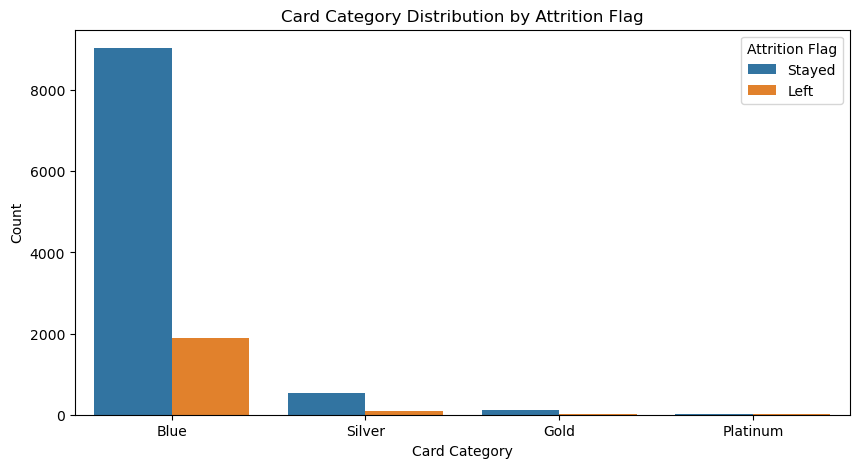

In [28]:
# Plotting card category distribution
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Card_Category', hue='Attrition_Flag')
plt.title('Card Category Distribution by Attrition Flag')
plt.xlabel('Card Category')
plt.ylabel('Count')
plt.legend(title='Attrition Flag', labels=['Stayed', 'Left'])
plt.show()

# Category Counts
We will analyze the counts of card categories and income categories for both groups.

# Card Category Distribution

In [31]:
card_category_counts = df["Card_Category"].value_counts()
print("Card Category Counts:\n", card_category_counts)

Card Category Counts:
 Card_Category
Blue        10932
Silver        639
Gold          132
Platinum       22
Name: count, dtype: int64


# Attrition by Card Category

In [33]:
attrition_by_card = df[df["Attrition_Flag"] == 1]["Card_Category"].value_counts()
print("Attrition by Card Category:\n", attrition_by_card)

Attrition by Card Category:
 Card_Category
Blue        1895
Silver       100
Gold          23
Platinum       7
Name: count, dtype: int64


# Income Category Distribution

In [35]:
income_category_counts = df["Income_Category"].value_counts()
print("Income Category Counts:\n", income_category_counts)

Income Category Counts:
 Income_Category
Less than $40K    5433
$40K - $60K       2072
$80K - $120K      1755
$60K - $80K       1618
$120K +            847
Name: count, dtype: int64


# Gender Analysis
We will analyze how gender affects attrition.

In [37]:
# Gender distribution in the dataset
gender_counts = df["Gender"].value_counts()
print("Gender Counts:\n", gender_counts)

# Attrition by Gender
attrition_by_gender = existing_one["Gender"].value_counts() / gender_counts * 100
print("Attrition by Gender (%):\n", attrition_by_gender)

Gender Counts:
 Gender
F    6330
M    5395
Name: count, dtype: int64
Attrition by Gender (%):
 Gender
F    18.515008
M    15.810936
Name: count, dtype: float64


# Attrition by Gender

In [39]:
attrition_by_gender = existing_one["Gender"].value_counts() / gender_counts * 100
print("Attrition by Gender (%):\n", attrition_by_gender)

Attrition by Gender (%):
 Gender
F    18.515008
M    15.810936
Name: count, dtype: float64


# Marital Status Analysis
We will analyze the marital status of customers who left.

Marital Status Counts (Left):
 Marital_Status
Married     1078
Single       796
Divorced     151
Name: count, dtype: int64


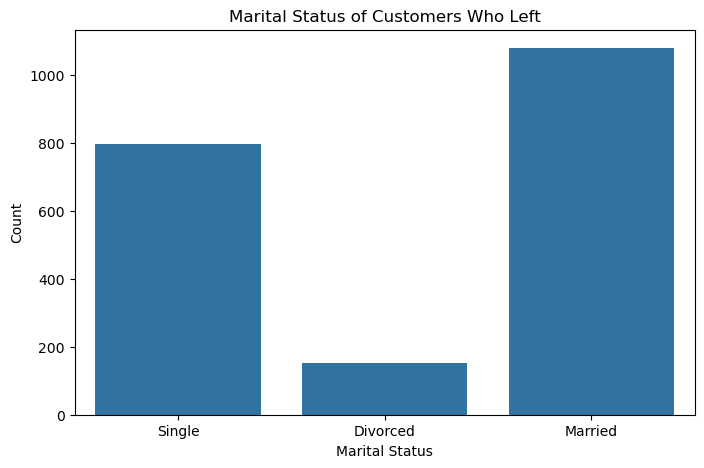

In [41]:
# Marital Status Distribution for Customers Who Left
marital_status_counts = existing_one["Marital_Status"].value_counts()
print("Marital Status Counts (Left):\n", marital_status_counts)

# Plotting marital status distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=existing_one, x='Marital_Status')
plt.title('Marital Status of Customers Who Left')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()

# Education Level Analysis
we will analyze the education levels of customers who left.

Education Level Counts (Left):
 Education_Level
High School      716
Graduate         593
Uneducated       283
College          192
Doctorate        127
Post-Graduate    114
Name: count, dtype: int64


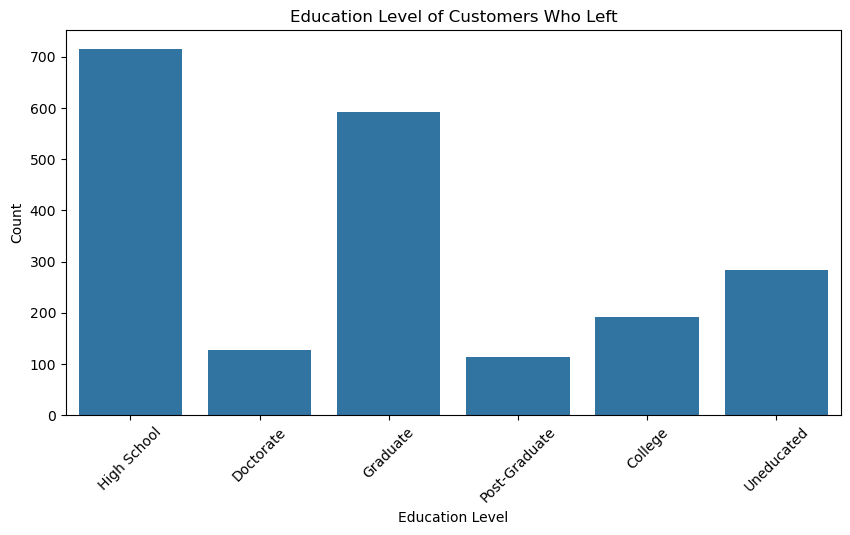

In [43]:
# Education level of customers who left
education_counts = existing_one["Education_Level"].value_counts()
print("Education Level Counts (Left):\n", education_counts)

# Plotting education level distribution
plt.figure(figsize=(10, 5))
sns.countplot(data=existing_one, x='Education_Level')
plt.title('Education Level of Customers Who Left')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Convert Data Types (from string to numerical)

In [45]:
label_encoder = LabelEncoder()

# List of string columns
string_columns = ['Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category', 'Gender']

# Loop through each column and apply LabelEncoder
for col in string_columns:
    df[col] = label_encoder.fit_transform(df[col])

# Outlier Detection and Removal

In [47]:
#IQR
def IQR(col):
    q1 = col.quantile(0.25)
    q3 = col.quantile(0.75)
    iqr = q3 - q1
    upper_limit = q3 + (1.5 * iqr)
    lower_limit = q1 - (1.5 * iqr)
    return upper_limit, lower_limit

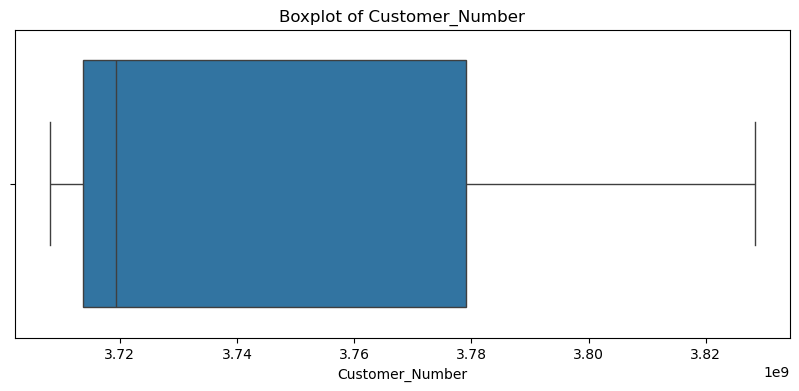

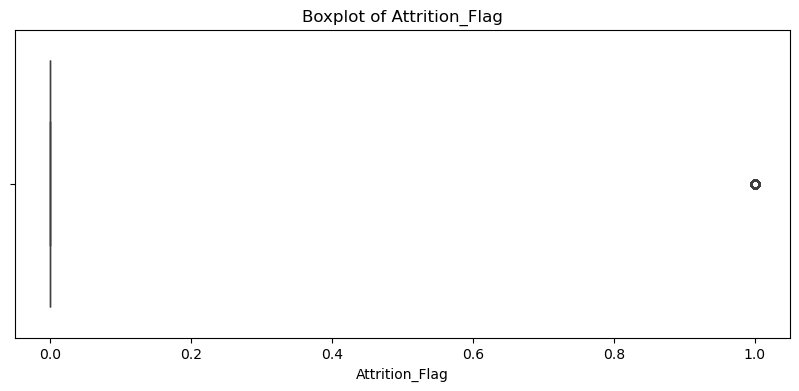

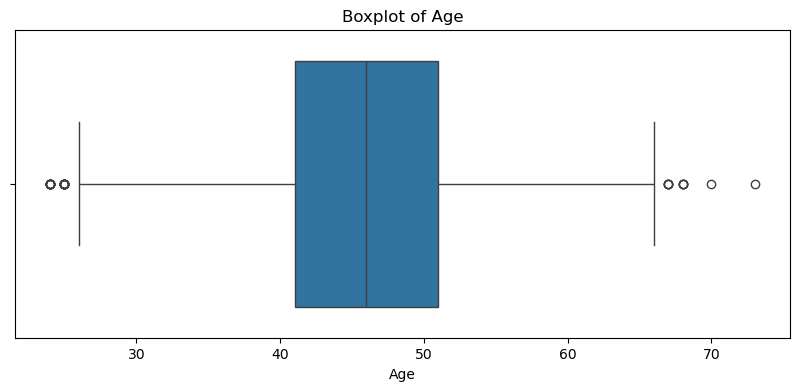

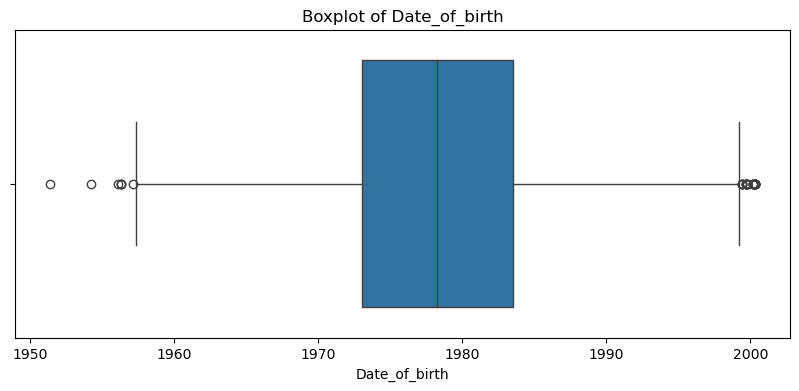

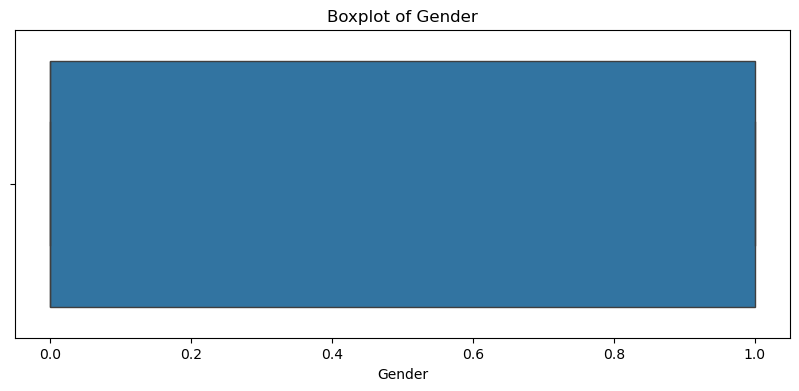

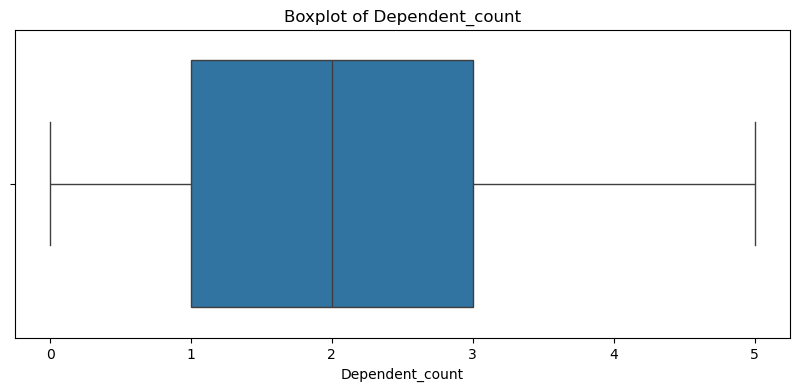

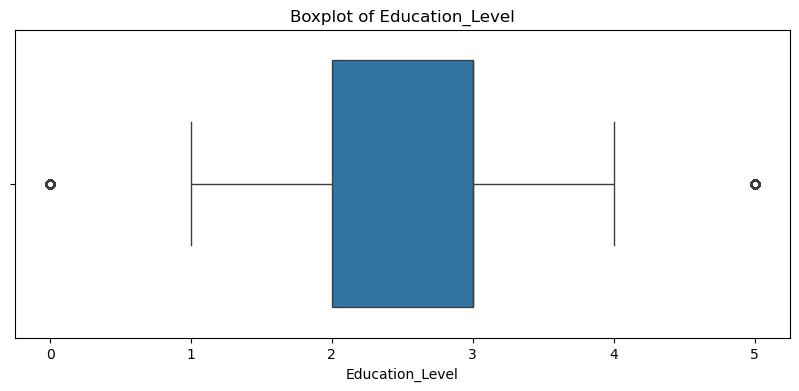

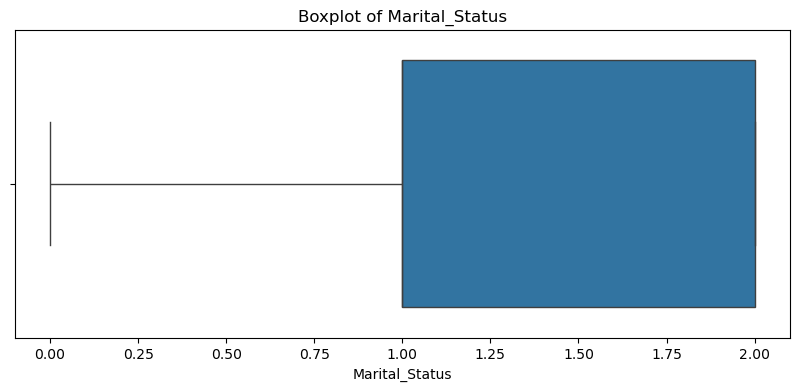

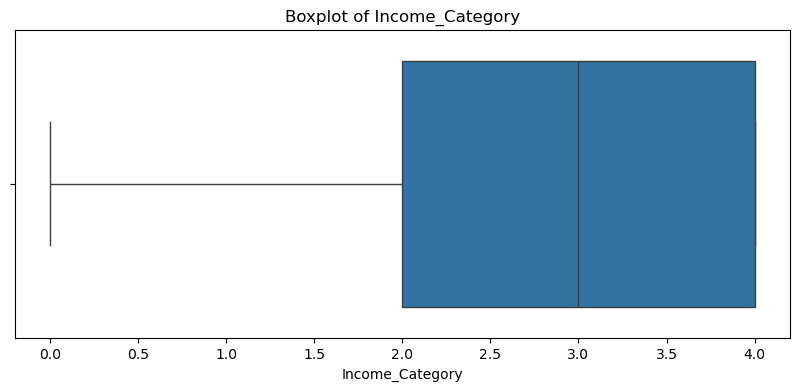

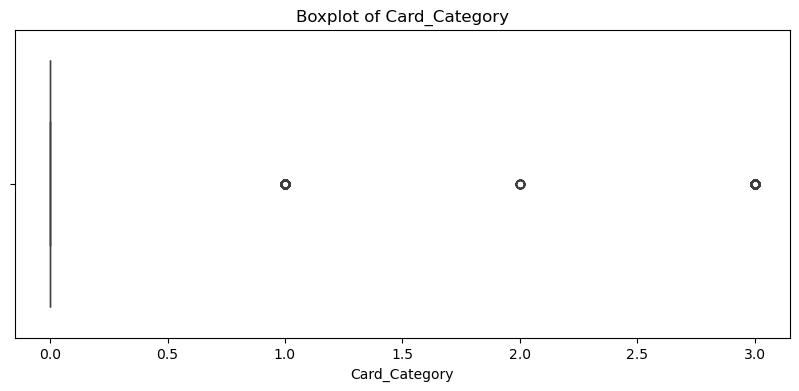

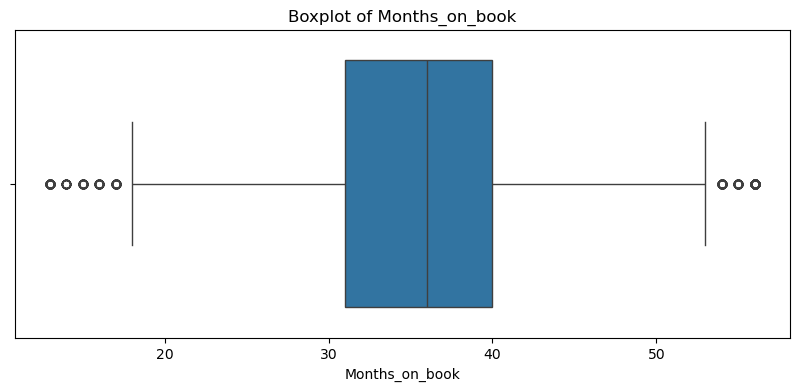

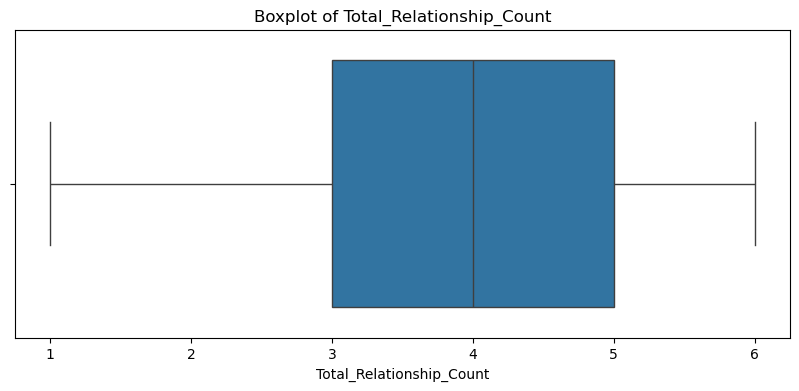

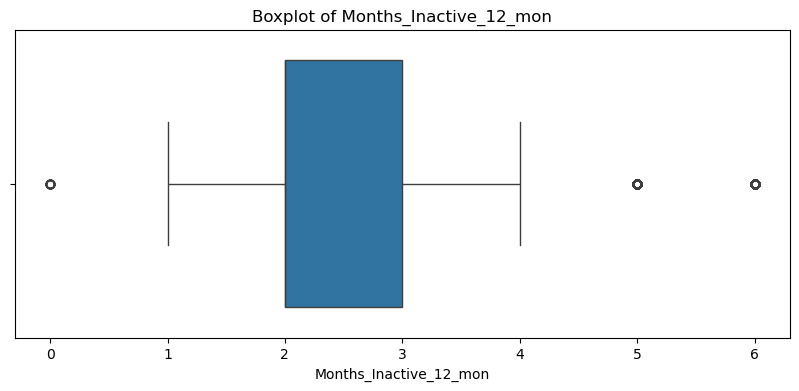

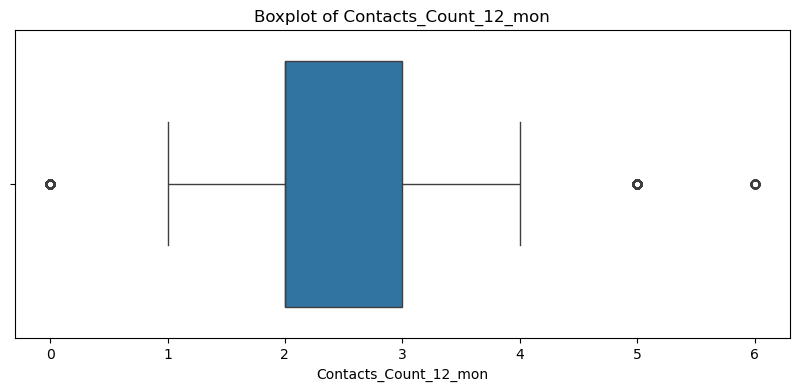

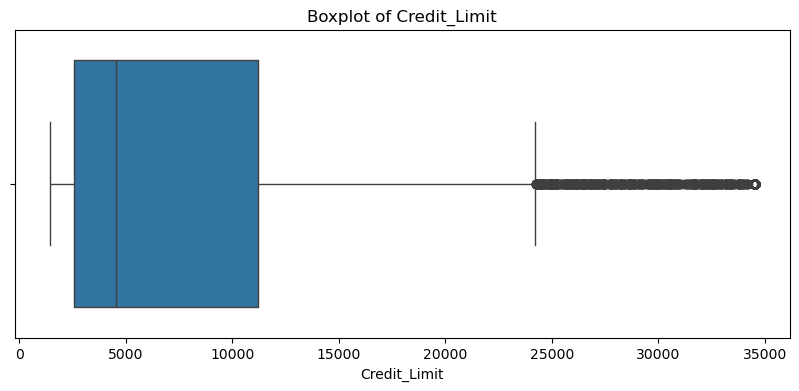

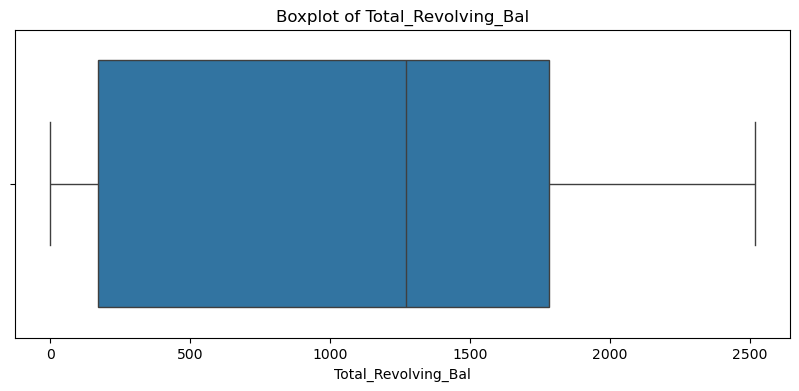

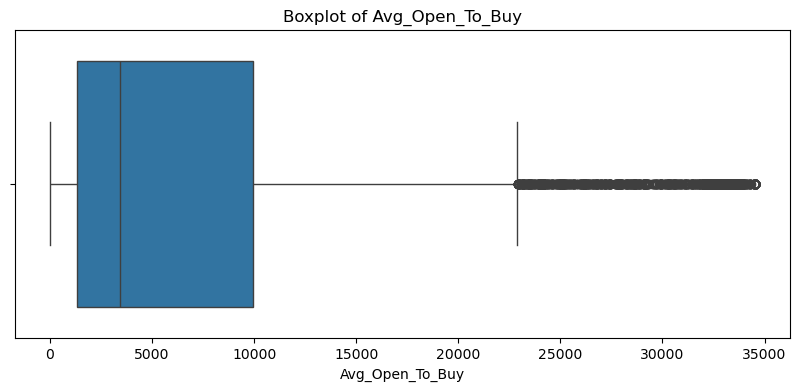

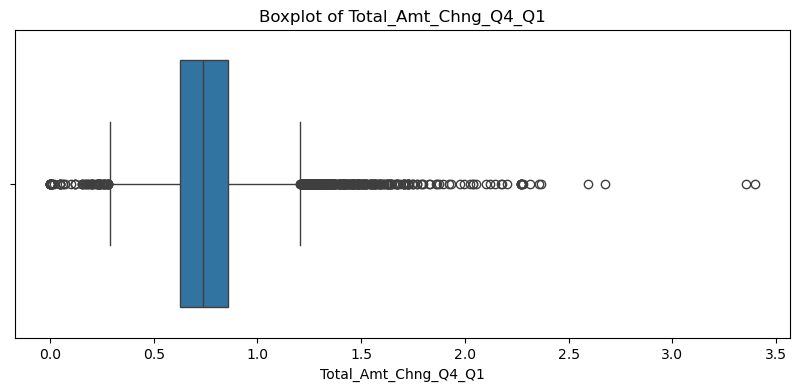

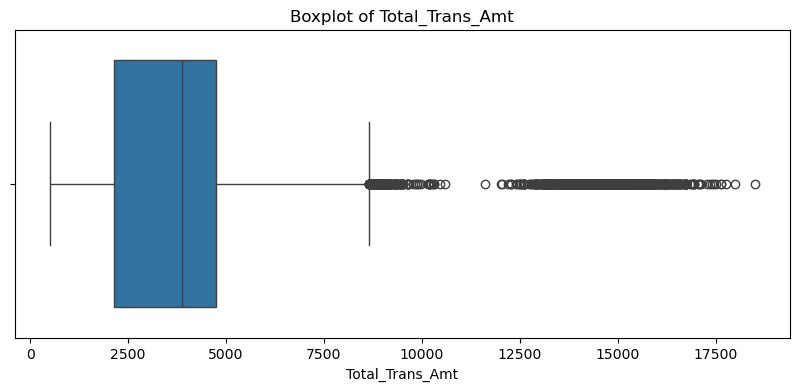

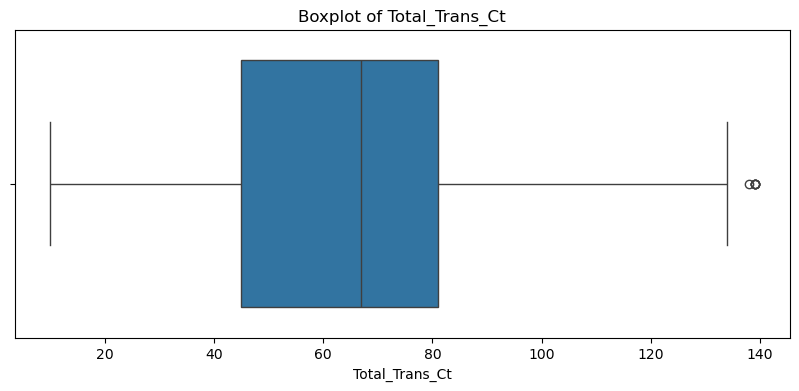

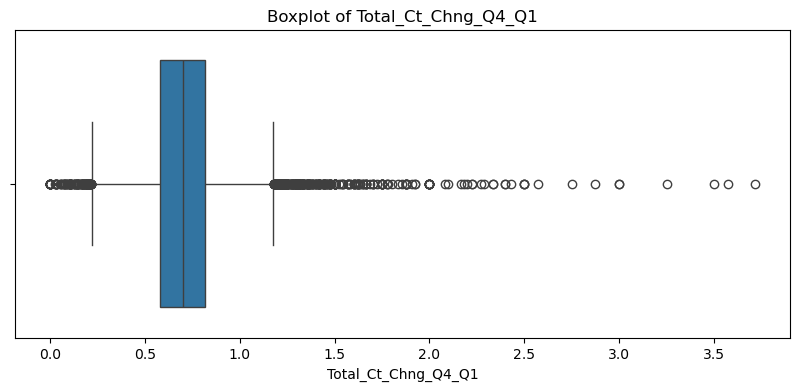

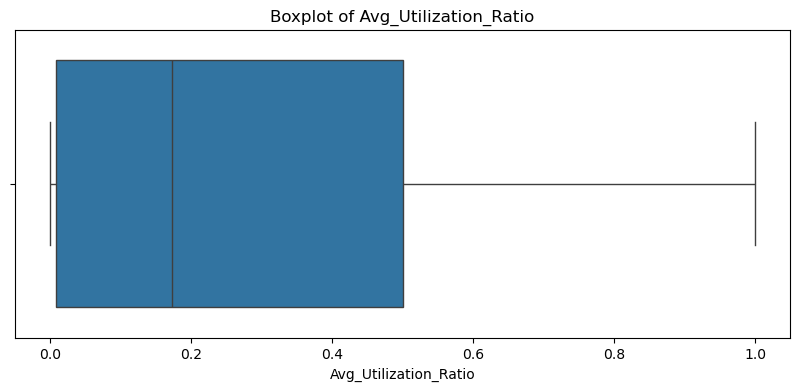

In [48]:
for col in df:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

In [49]:
# Define the columns to check for outliers
columns = ['Age', 'Months_on_book', 'Credit_Limit', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Ct_Chng_Q4_Q1']

In [50]:
# Loop over each column and perform the outlier removal
for col in columns:
    # Calculate the IQR limits for the column
    upper_limit, lower_limit = IQR(df[col])
    
    # Print shape before removing outliers
    before_remove_outlier = df.shape
    print(f"Before removing outliers from {col}:", before_remove_outlier)
    
    # Filter the dataframe to remove outliers
    df = df[(df[col] < upper_limit) & (df[col] > lower_limit)]
    
    # Print shape after removing outliers
    after_remove_outlier = df.shape
    print(f"After removing outliers from {col}:", after_remove_outlier)
    
    # Print the number of outliers removed
    print(f"Outliers removed from {col}:", before_remove_outlier[0] - after_remove_outlier[0])

Before removing outliers from Age: (11725, 22)
After removing outliers from Age: (11565, 22)
Outliers removed from Age: 160
Before removing outliers from Months_on_book: (11565, 22)
After removing outliers from Months_on_book: (10804, 22)
Outliers removed from Months_on_book: 761
Before removing outliers from Credit_Limit: (10804, 22)
After removing outliers from Credit_Limit: (9823, 22)
Outliers removed from Credit_Limit: 981
Before removing outliers from Avg_Open_To_Buy: (9823, 22)
After removing outliers from Avg_Open_To_Buy: (9238, 22)
Outliers removed from Avg_Open_To_Buy: 585
Before removing outliers from Total_Amt_Chng_Q4_Q1: (9238, 22)
After removing outliers from Total_Amt_Chng_Q4_Q1: (8876, 22)
Outliers removed from Total_Amt_Chng_Q4_Q1: 362
Before removing outliers from Total_Trans_Amt: (8876, 22)
After removing outliers from Total_Trans_Amt: (8172, 22)
Outliers removed from Total_Trans_Amt: 704
Before removing outliers from Total_Ct_Chng_Q4_Q1: (8172, 22)
After removing out

# Correlation Analysis of Customer Attributes


In [52]:
corr = df.corr()
corr

,Customer_Number,Attrition_Flag,Age,Date_of_birth,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
Customer_Number,1.000000,-0.017217,-0.050864,0.050818,0.010340,0.021233,-0.009030,-0.017736,-0.031428,-0.007188,...,0.000806,-0.006202,0.012661,-0.000419,0.012731,0.018400,-0.005300,0.006859,0.009570,-0.000376
Attrition_Flag,-0.017217,1.000000,0.016054,-0.016738,-0.033140,0.007963,-0.007747,0.008370,0.022675,-0.007090,...,0.159865,0.191428,-0.037251,-0.250444,0.012981,-0.109703,-0.276256,-0.455186,-0.375161,-0.198157
Age,-0.050864,0.016054,1.000000,-0.999632,-0.011115,-0.138103,0.003367,0.017080,-0.011544,-0.016534,...,0.022595,-0.006386,0.002492,0.005690,0.001349,-0.069327,-0.005018,-0.048483,-0.040508,0.002496
Date_of_birth,0.050818,-0.016738,-0.999632,1.000000,0.011131,0.138121,-0.002916,-0.017259,0.011497,0.016567,...,-0.022490,0.005962,-0.002954,-0.005380,-0.001873,0.068555,0.004617,0.048524,0.040102,-0.001995
Gender,0.010340,-0.033140,-0.011115,0.011131,1.000000,-0.007078,-0.003790,-0.008017,-0.511898,-0.031116,...,-0.009101,0.040266,0.332632,0.032311,0.325798,-0.021782,-0.124848,-0.139668,-0.054447,-0.164062
Dependent_count,0.021233,0.007963,-0.138103,0.138121,-0.007078,1.000000,0.003294,-0.007602,-0.017625,0.021668,...,-0.004276,-0.027462,0.036960,0.008379,0.035241,-0.031501,0.068804,0.053912,0.004949,-0.009463
Education_Level,-0.009030,-0.007747,0.003367,-0.002916,-0.003790,0.003294,1.000000,0.020839,0.017070,0.011998,...,-0.004188,0.013164,0.004263,0.009846,0.002285,0.004946,0.006920,-0.000170,0.010185,0.011826
Marital_Status,-0.017736,0.008370,0.017080,-0.017259,-0.008017,-0.007602,0.020839,1.000000,0.006762,0.001958,...,-0.002449,0.000827,0.003640,-0.022850,0.008215,0.008693,0.053465,0.072164,0.026201,-0.008408
Income_Category,-0.031428,0.022675,-0.011544,0.011497,-0.511898,-0.017625,0.017070,0.006762,1.000000,0.002056,...,0.024787,-0.003880,-0.198039,-0.020956,-0.193625,0.003573,0.072492,0.082875,0.020970,0.103269
Card_Category,-0.007188,-0.007090,-0.016534,0.016567,-0.031116,0.021668,0.011998,0.001958,0.002056,1.000000,...,-0.018997,-0.010095,0.296218,0.030916,0.289702,-0.011050,0.038215,0.008003,-0.004617,-0.107102


# Visualizing the correlation matrix using a heatmap

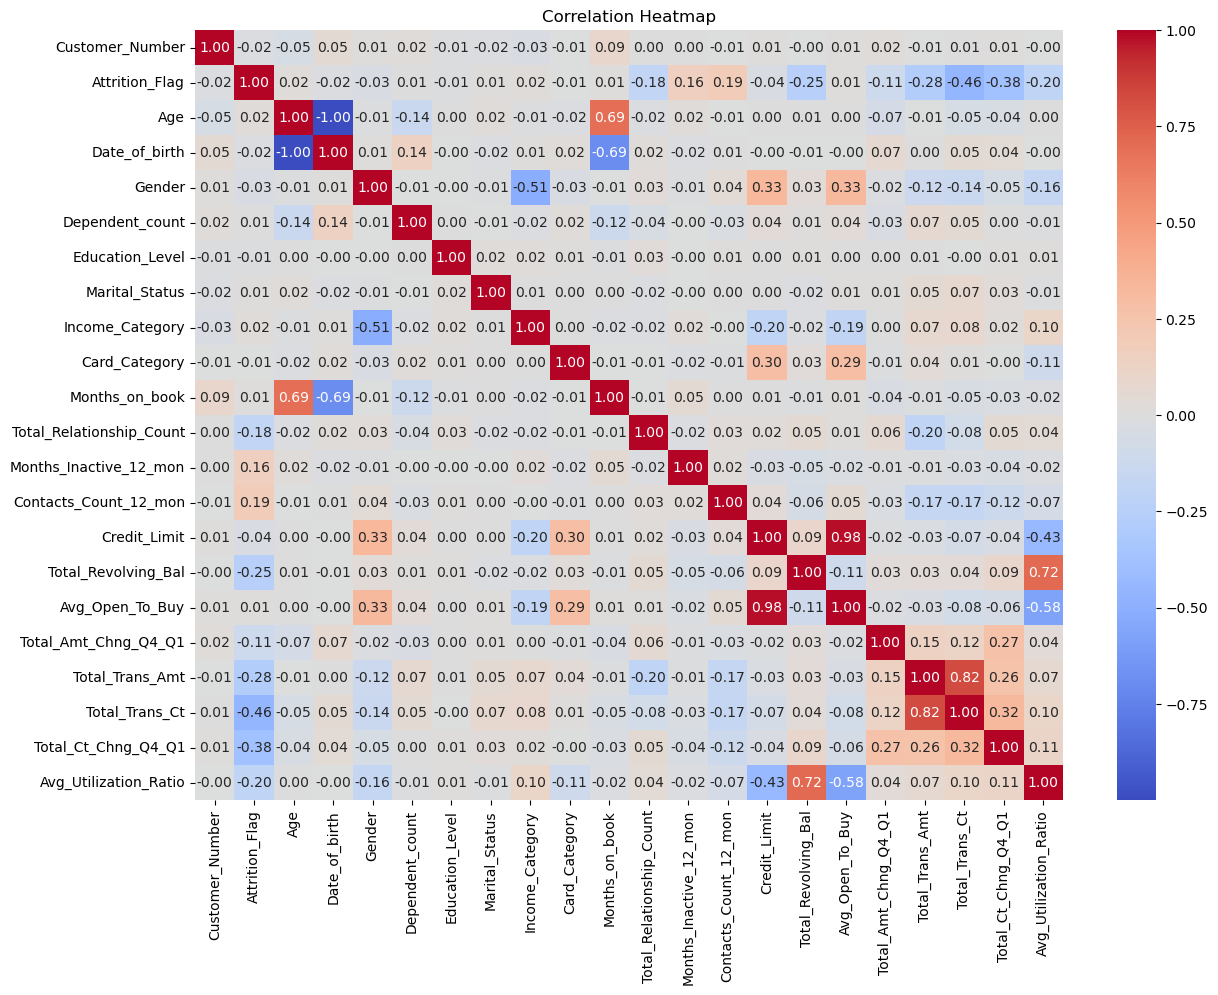

In [54]:
#Correlation Heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Splitting Data

In [56]:
x = df.drop(["Attrition_Flag", "Customer_Number", "Date_of_birth"], axis=1)
y = df["Attrition_Flag"]

In [57]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Scale Features

In [59]:
sc = preprocessing.StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [60]:
x_train

array([[-0.87596285, -0.770929  , -1.16079984, ..., -0.98768986,
        -0.82187115,  2.29586403],
       [ 0.2498383 , -0.770929  , -1.16079984, ...,  1.61031976,
        -0.2047119 ,  0.0574078 ],
       [ 0.10911316, -0.770929  ,  2.05177033, ...,  1.20278884,
         0.7838352 ,  1.23959249],
       ...,
       [-0.31306227, -0.770929  , -0.3576573 , ..., -0.32545212,
        -0.47232963, -1.10379137],
       [-1.01668799,  1.29713632, -0.3576573 , ..., -1.54804488,
         1.71230486, -0.4917135 ],
       [-1.15741313, -0.770929  , -0.3576573 , ...,  0.64243382,
        -0.49417597,  0.33371724]])

# Random Forest Model Training and Evaluation

This section outlines the process of training Random Forest Modelel using Grid Search for hyperparameter tuning and evaluates its performance.

# Model Training

In [63]:
# Define the model
rf = RandomForestClassifier()

In [64]:
# Define hyperparameters to tune
param_grid = {
    'n_estimators': [100, 200],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}


In [65]:
# Setup the grid search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=2)

In [66]:
# Fit the model
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             verbose=2)

In [67]:
# Best parameters
print("Best parameters found: ", grid_search.best_params_)

Best parameters found:  {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [68]:
# Extract the best estimator from Grid Search
model = grid_search.best_estimator_

In [69]:
# Make predictions using the test set
y_pred = model.predict(x_test)

# Model Evaluation

In [71]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Generate classification report
class_report = classification_report(y_test, y_pred)

# Print evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.96
Confusion Matrix:
[[1908   27]
 [  80  372]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1935
           1       0.93      0.82      0.87       452

    accuracy                           0.96      2387
   macro avg       0.95      0.90      0.92      2387
weighted avg       0.95      0.96      0.95      2387



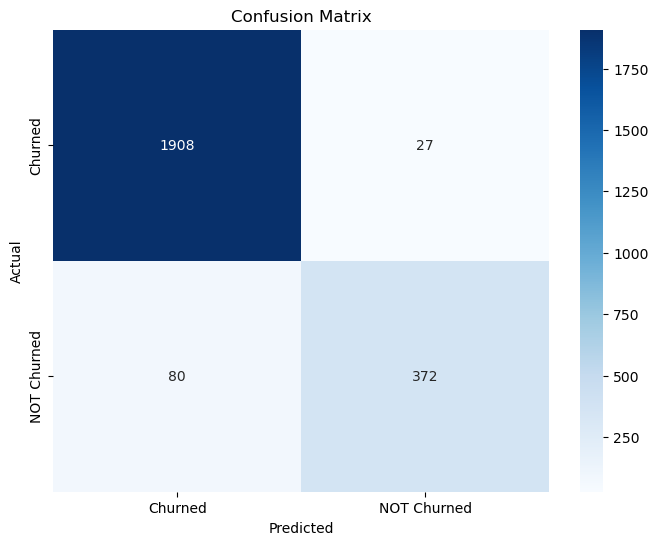

In [72]:
# Visualizing the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Churned', 'NOT Churned'],
            yticklabels=['Churned', 'NOT Churned'])
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.title('Confusion Matrix')
plt.show()